<a href="https://colab.research.google.com/github/worldterminator/mess/blob/main/Dan's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Set the URL of the raw dataset (replace this with the correct raw URL)
df = pd.read_csv('https://github.com/worldterminator/mess/raw/main/mmc2.csv')

# Load the CSV data into a DataFrame

# Display the DataFrame
print(df.head())


                    location year_month public total total_sex_male  \
0  Australia_New South Wales   Jan 2019      Y    75             .a   
1  Australia_New South Wales   Feb 2019      Y    72             .a   
2  Australia_New South Wales   Mar 2019      Y    91             .a   
3  Australia_New South Wales   Apr 2019      Y    56             .a   
4  Australia_New South Wales   May 2019      Y    67             .a   

  total_sex_female total_age_0_19 total_age_20_39 total_age_40_59  \
0               .a             .a              .a              .a   
1               .a             .a              .a              .a   
2               .a             .a              .a              .a   
3               .a             .a              .a              .a   
4               .a             .a              .a              .a   

  total_age_60_max total_sex_male_age_0_19 total_sex_male_age_20_39  \
0               .a                      .a                       .a   
1               

In [22]:
# Subset the DataFrame to keep only rows where 'location' is 'USA'
usa_df = df[df['location'] == 'USA'].copy()

# Resetting index for convenience
usa_df.reset_index(drop=True, inplace=True)

usa_df.head()


,location,year_month,public,total,total_sex_male,total_sex_female,total_age_0_19,total_age_20_39,total_age_40_59,total_age_60_max,total_sex_male_age_0_19,total_sex_male_age_20_39,total_sex_male_age_40_59,total_sex_male_age_60_max,total_sex_female_age_0_19,total_sex_female_age_20_39,total_sex_female_age_40_59,total_sex_female_age_60_max
0,USA,Jan 2016,Y,3720,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
1,USA,Feb 2016,Y,3445,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
2,USA,Mar 2016,Y,3921,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
3,USA,Apr 2016,Y,3812,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
4,USA,May 2016,Y,3853,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a


In [24]:
import numpy as np  # Adding the missing import statement

# Convert 'year_month' to a datetime object
usa_df['year_month'] = pd.to_datetime(usa_df['year_month'], format='%b %Y')

# Set 'year_month' as the index
usa_df.set_index('year_month', inplace=True)

# For segmented regression, you may want to create a binary variable representing the period before and after the breakpoint
usa_df['post_breakpoint'] = (usa_df.index >= '2020-03-01').astype(int)

# You might also want to create a time variable representing the months elapsed since the beginning of the series
usa_df['time'] = np.arange(len(usa_df))

usa_df.head()

,location,public,total,total_sex_male,total_sex_female,total_age_0_19,total_age_20_39,total_age_40_59,total_age_60_max,total_sex_male_age_0_19,total_sex_male_age_20_39,total_sex_male_age_40_59,total_sex_male_age_60_max,total_sex_female_age_0_19,total_sex_female_age_20_39,total_sex_female_age_40_59,total_sex_female_age_60_max,post_breakpoint,time
year_month,,,,,,,,,,,,,,,,,,,
2016-01-01,USA,Y,3720,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,0
2016-02-01,USA,Y,3445,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,1
2016-03-01,USA,Y,3921,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,2
2016-04-01,USA,Y,3812,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,3
2016-05-01,USA,Y,3853,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,4


In [25]:
print(usa_df.columns)

Index(['location', 'public', 'total', 'total_sex_male', 'total_sex_female',
       'total_age_0_19', 'total_age_20_39', 'total_age_40_59',
       'total_age_60_max', 'total_sex_male_age_0_19',
       'total_sex_male_age_20_39', 'total_sex_male_age_40_59',
       'total_sex_male_age_60_max', 'total_sex_female_age_0_19',
       'total_sex_female_age_20_39', 'total_sex_female_age_40_59',
       'total_sex_female_age_60_max', 'post_breakpoint', 'time'],
      dtype='object')


In [46]:
# Convert columns to numeric, handling errors by converting them to NaN
usa_df['total'] = pd.to_numeric(usa_df['total'], errors='coerce')
usa_df['time'] = pd.to_numeric(usa_df['time'], errors='coerce')
usa_df['post_breakpoint'] = pd.to_numeric(usa_df['post_breakpoint'], errors='coerce')
usa_df['time_after_breakpoint'] = pd.to_numeric(usa_df['time_after_breakpoint'], errors='coerce')

# Drop rows where any of the above columns have NaN values
usa_df = usa_df.dropna(subset=['total', 'time', 'post_breakpoint', 'time_after_breakpoint'])


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.630
Date:                Sun, 01 Oct 2023   Prob (F-statistic):              0.193
Time:                        00:59:56   Log-Likelihood:                -420.69
No. Observations:                  61   AIC:                             849.4
Df Residuals:                      57   BIC:                             857.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3797.98

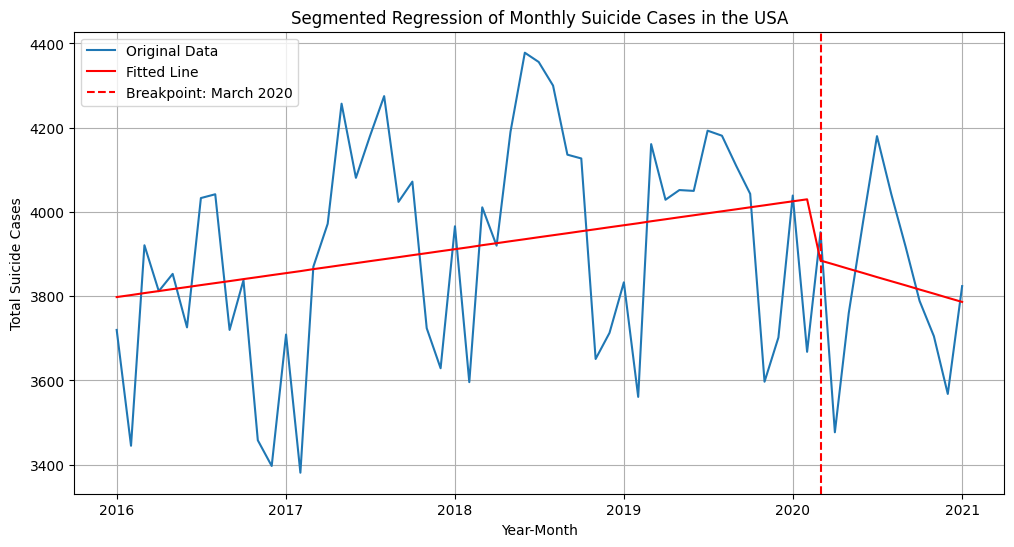

In [47]:
import statsmodels.api as sm

# Create the independent variable for the regression model
usa_df['time_after_breakpoint'] = usa_df['time'] * usa_df['post_breakpoint']
X = usa_df[['time', 'post_breakpoint', 'time_after_breakpoint']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Create the dependent variable
y = usa_df['total']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

# Predict the values using the model
usa_df['predicted'] = model.predict(X)

# Plot the original data and the fitted line
plt.figure(figsize=(12, 6))
plt.plot(usa_df.index, usa_df['total'], label='Original Data')
plt.plot(usa_df.index, usa_df['predicted'], color='red', label='Fitted Line')
plt.axvline(pd.Timestamp('2020-03-01'), color='r', linestyle='--', label='Breakpoint: March 2020')
plt.title('Segmented Regression of Monthly Suicide Cases in the USA')
plt.xlabel('Year-Month')
plt.ylabel('Total Suicide Cases')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
print(usa_df[['total']])

           total
year_month      
2016-01-01  3720
2016-02-01  3445
2016-03-01  3921
2016-04-01  3812
2016-05-01  3853
...          ...
2020-09-01  3917
2020-10-01  3789
2020-11-01  3705
2020-12-01  3568
2021-01-01  3824

[61 rows x 1 columns]


In [29]:
usa_df = usa_df.sort_index()


In [40]:
print(usa_df.loc['2019':'2020'])


           location public total total_sex_male total_sex_female  \
year_month                                                         
2019-01-01      USA      Y  3833             .a               .a   
2019-02-01      USA      Y  3561             .a               .a   
2019-03-01      USA      Y  4161             .a               .a   
2019-04-01      USA      Y  4029             .a               .a   
2019-05-01      USA      Y  4052             .a               .a   
2019-06-01      USA      Y  4050             .a               .a   
2019-07-01      USA      Y  4193             .a               .a   
2019-08-01      USA      Y  4181             .a               .a   
2019-09-01      USA      Y  4109             .a               .a   
2019-10-01      USA      Y  4043             .a               .a   
2019-11-01      USA      Y  3597             .a               .a   
2019-12-01      USA      Y  3702             .a               .a   
2020-01-01      USA      Y  4039             .a 

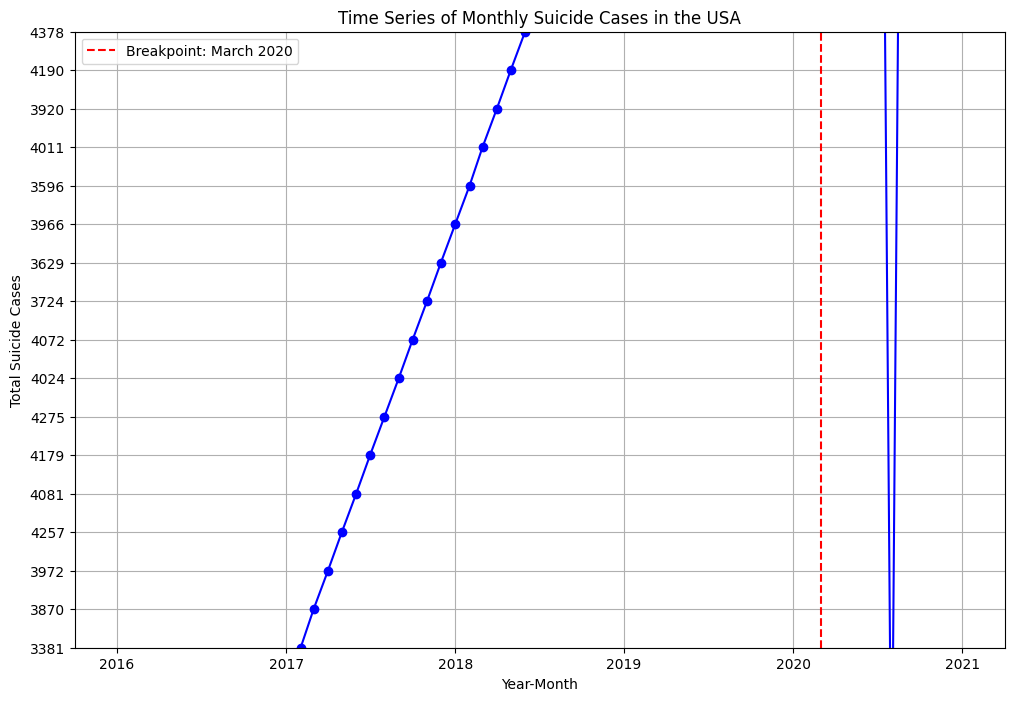

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(usa_df.index, usa_df['total'], marker='o', linestyle='-', color='b')
plt.axvline(pd.Timestamp('2020-03-01'), color='r', linestyle='--', label='Breakpoint: March 2020')
plt.title('Time Series of Monthly Suicide Cases in the USA')
plt.xlabel('Year-Month')
plt.ylabel('Total Suicide Cases')
plt.ylim([min(usa_df['total']), max(usa_df['total'])])  # Adjust y-axis limits if necessary

plt.legend()
plt.grid(True)
plt.show()



